<a href="https://colab.research.google.com/github/paulinakaszuba94/MRR/blob/main/MRR_Paulina_Kaszuba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook created by Paulina Kaszuba - February 2021**

# Preparation

**Import of the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from pandas.tseries.offsets import MonthEnd

from datetime import datetime
import dateutil.parser
from ast import literal_eval

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Load files**

In [ ]:
ls

drive/  sample_data/


In [ ]:
#Attention! Please upload input files (ds_sales_data.csv and ds_license_data.csv)
#into the Colab environment (go to the left side -> click 'Files' -> right click on the 'sample_data' -> upload)
#files can be load from the hard drive (at first download them from the Google Drive).
#You can also load them directly form your Google Drive.

df1 = pd.read_csv("sample_data/ds_sales_data.csv", sep=";")
df2 = pd.read_csv("sample_data/ds_license_data.csv", sep=";")

# Explore df1 (ds_sales_data)

In [ ]:
#Show the first 5 rows
df1.head()

,transactionId,addonLicenseId,hostLicenseId,licenseId,saleDate,addonName,addonKey,hosting,billingPeriod,tier,licenseType,maintenanceStartDate,maintenanceEndDate,saleType,purchasePrice,vendorAmount
0,AT-71004759,12322025,12260340.0,SEN-12339366,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (12 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,6,"4,5"
1,AT-71004540,12808966,12182250.0,SEN-12261475,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (10 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,5,"3,75"
2,AT-71002970,12011999,11661004.0,SEN-11736283,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (45 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,"22,5","16,87"
3,AT-71000730,11546508,10933194.0,SEN-10925509,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (14 users),COMMERCIAL,2019-02-24,2019-03-24,Upgrade,7,"5,25"
4,AT-71000029,12361793,10346791.0,SEN-10374853,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (69 users),COMMERCIAL,2019-02-24,2019-03-24,Upgrade,"34,5","25,87"


In [ ]:
print("df1 contains (rows, columns):", df1.shape)
print("Column names:", df1.columns)

df1 contains (rows, columns): (4012, 16)
Column names: Index(['transactionId', 'addonLicenseId', 'hostLicenseId', 'licenseId',
       'saleDate', 'addonName', 'addonKey', 'hosting', 'billingPeriod', 'tier',
       'licenseType', 'maintenanceStartDate', 'maintenanceEndDate', 'saleType',
       'purchasePrice', 'vendorAmount'],
      dtype='object')


In [ ]:
#General information about dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transactionId         4012 non-null   object 
 1   addonLicenseId        4012 non-null   int64  
 2   hostLicenseId         3597 non-null   float64
 3   licenseId             4012 non-null   object 
 4   saleDate              4012 non-null   object 
 5   addonName             4012 non-null   object 
 6   addonKey              4012 non-null   object 
 7   hosting               4012 non-null   object 
 8   billingPeriod         4012 non-null   object 
 9   tier                  4012 non-null   object 
 10  licenseType           4012 non-null   object 
 11  maintenanceStartDate  4012 non-null   object 
 12  maintenanceEndDate    4012 non-null   object 
 13  saleType              4012 non-null   object 
 14  purchasePrice         4012 non-null   object 
 15  vendorAmount         

In [ ]:
#Change format of saleDate, maintenanceStartDate, maintenanceEndDate columns to 'datetime64 [ns]'
df1['saleDate'] = df1['saleDate'].apply(dateutil.parser.parse)
df1['maintenanceStartDate'] = df1['maintenanceStartDate'].apply(dateutil.parser.parse)
df1['maintenanceEndDate'] = df1['maintenanceEndDate'].apply(dateutil.parser.parse)

In [ ]:
#Change format of purchasePrice and vendorAmount columns to 'float64'
df1['purchasePrice'] = df1['purchasePrice'].astype(str).str.replace(',', '.').astype(float)
df1['vendorAmount'] = df1['vendorAmount'].astype(str).str.replace(',', '.').astype(float)

In [ ]:
#Check if the conversion is applied
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transactionId         4012 non-null   object        
 1   addonLicenseId        4012 non-null   int64         
 2   hostLicenseId         3597 non-null   float64       
 3   licenseId             4012 non-null   object        
 4   saleDate              4012 non-null   datetime64[ns]
 5   addonName             4012 non-null   object        
 6   addonKey              4012 non-null   object        
 7   hosting               4012 non-null   object        
 8   billingPeriod         4012 non-null   object        
 9   tier                  4012 non-null   object        
 10  licenseType           4012 non-null   object        
 11  maintenanceStartDate  4012 non-null   datetime64[ns]
 12  maintenanceEndDate    4012 non-null   datetime64[ns]
 13  saleType          

In [ ]:
#Check missing values
df1.isnull().sum()
#Only one column have missing values - hostLicenseId
#hostLicenseId is filled out only for the Cloud hosting type

transactionId             0
addonLicenseId            0
hostLicenseId           415
licenseId                 0
saleDate                  0
addonName                 0
addonKey                  0
hosting                   0
billingPeriod             0
tier                      0
licenseType               0
maintenanceStartDate      0
maintenanceEndDate        0
saleType                  0
purchasePrice             0
vendorAmount              0
dtype: int64

In [ ]:
#Check if there are duplicated rows
duplicates = df1[df1.duplicated()]
print("df1 has:", duplicates.shape[0], "duplicates.")

df1 has: 0 duplicates.


In [ ]:
#Check how many unique transactions are there
unique_transactions = df1['transactionId'].nunique()
unique_transactions
#We can see that not all transactionId numbers are unique

4010

In [ ]:
#Check which transactionId numbers are not unique
df1['transactionId'].value_counts(normalize=False).head()
#Two transactionId numbers apeear twice

AT-52141208    2
106912         2
AT-53934218    1
AT-57883823    1
AT-67611172    1
Name: transactionId, dtype: int64

In [ ]:
#Look at the transactionId number: 106912 
df1.loc[df1['transactionId'] == '106912']
#saleDate, licenseType and finally daleType is also the same for both of the rows here
#This could mean it was really one transaction with two products (different licenses, different levels)
#Check if it is possible to purchase two licenses at the same time (one transaction) needed
#If not it can be also a bug in the database

,transactionId,addonLicenseId,hostLicenseId,licenseId,saleDate,addonName,addonKey,hosting,billingPeriod,tier,licenseType,maintenanceStartDate,maintenanceEndDate,saleType,purchasePrice,vendorAmount
3349,106912,11541486,NaN,SEN-11538534,2018-04-12,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Server,Annual,Unlimited Users,ACADEMIC,2018-04-11,2019-04-11,Refund,-330.0,-247.50
3350,106912,11519274,NaN,SEN-11538533,2018-04-12,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Server,Annual,2000 Users,ACADEMIC,2018-04-11,2019-04-11,Refund,-225.0,-168.75


In [ ]:
#Look at the transactionId number: AT-52141208 
df1.loc[df1['transactionId'] == 'AT-52141208']
#saleDate, licenseType and finally daleType is also the same for both of the rows here
#This could mean it was really one transaction with two products (different licenses, different levels)
#Check if it is possible to purchase two licenses at the same time (one transaction) needed
#If not it can be also a bug in the database

,transactionId,addonLicenseId,hostLicenseId,licenseId,saleDate,addonName,addonKey,hosting,billingPeriod,tier,licenseType,maintenanceStartDate,maintenanceEndDate,saleType,purchasePrice,vendorAmount
3358,AT-52141208,11541486,NaN,SEN-11538534,2018-04-11,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Server,Annual,Unlimited Users,ACADEMIC,2018-04-11,2019-04-11,New,330.0,247.50
3359,AT-52141208,11519274,NaN,SEN-11538533,2018-04-11,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Server,Annual,2000 Users,ACADEMIC,2018-04-11,2019-04-11,New,225.0,168.75


In [ ]:
#Check how many unique addonLicenseId numbers are there
unique_addonLicense = df1['addonLicenseId'].nunique()
unique_addonLicense
#There is 922 unique addonLicenseId numbers

922

In [ ]:
#Check how many unique licenseId numbers are there
unique_license = df1['licenseId'].nunique()
unique_license
#There is 922 unique licenseId numbers which is the same as for addonLicenseId
#It means that all transactions (4012) are connected with 922 licenses

922

In [ ]:
df1['addonLicenseId'].value_counts(normalize=False).head()

8933051    24
9156122    23
9144909    23
9172684    22
9326525    22
Name: addonLicenseId, dtype: int64

In [ ]:
df1.loc[df1['addonLicenseId'] == 8933051]
#We can see a regular customer here - we have monthly renewals and upgrades

,transactionId,addonLicenseId,hostLicenseId,licenseId,saleDate,addonName,addonKey,hosting,billingPeriod,tier,licenseType,maintenanceStartDate,maintenanceEndDate,saleType,purchasePrice,vendorAmount
455,AT-69376167,8933051,7439772.0,SEN-7431230,2019-01-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (37 users),COMMERCIAL,2019-01-27,2019-02-27,Upgrade,18.5,13.87
915,AT-67611172,8933051,7439772.0,SEN-7431230,2018-12-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (36 users),COMMERCIAL,2018-12-27,2019-01-27,Renewal,18.0,13.50
1342,AT-65822095,8933051,7439772.0,SEN-7431230,2018-11-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (36 users),COMMERCIAL,2018-11-27,2018-12-27,Upgrade,18.0,13.50
1720,AT-64000288,8933051,7439772.0,SEN-7431230,2018-10-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (35 users),COMMERCIAL,2018-10-27,2018-11-27,Upgrade,17.5,13.12
2077,AT-62213551,8933051,7439772.0,SEN-7431230,2018-09-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (33 users),COMMERCIAL,2018-09-27,2018-10-27,Renewal,16.5,12.37
2380,AT-60462377,8933051,7439772.0,SEN-7431230,2018-08-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (34 users),COMMERCIAL,2018-08-27,2018-09-27,Upgrade,17.0,12.75
2666,AT-58731767,8933051,7439772.0,SEN-7431230,2018-07-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (33 users),COMMERCIAL,2018-07-27,2018-08-27,Renewal,16.5,12.37
2925,AT-57044889,8933051,7439772.0,SEN-7431230,2018-06-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (39 users),COMMERCIAL,2018-06-27,2018-07-27,Upgrade,19.5,14.62
3107,AT-55350773,8933051,7439772.0,SEN-7431230,2018-05-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (35 users),COMMERCIAL,2018-05-27,2018-06-27,Renewal,17.5,13.12
3268,AT-53670522,8933051,7439772.0,SEN-7431230,2018-04-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (36 users),COMMERCIAL,2018-04-27,2018-05-27,Renewal,18.0,13.50


# Explore df2 (ds_license_data)

In [ ]:
#Show the first 5 rows
df2.head()

,addonLicenseId,hostLicenseId,licenseId,addonKey,addonName,licenseType,maintenanceStartDate,maintenanceEndDate,status,hosting,tier
0,13235537,NaN,SEN-13234022,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-23,2020-02-23,active,Server,10 Users
1,13164943,NaN,SEN-13224618,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-21,2020-02-21,active,Server,25 Users
2,13160354,NaN,SEN-13222431,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-21,2020-02-21,active,Server,10 Users
3,13144745,NaN,SEN-13220676,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-20,2020-02-20,active,Server,25 Users
4,13195358,NaN,SEN-13216777,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-20,2020-02-20,active,Server,500 Users


In [ ]:
print("df2 contains (rows, columns):", df2.shape)
print("Column names:", df2.columns)

df2 contains (rows, columns): (918, 11)
Column names: Index(['addonLicenseId', 'hostLicenseId', 'licenseId', 'addonKey', 'addonName',
       'licenseType', 'maintenanceStartDate', 'maintenanceEndDate', 'status',
       'hosting', 'tier'],
      dtype='object')


In [ ]:
#General information about dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addonLicenseId        918 non-null    int64  
 1   hostLicenseId         584 non-null    float64
 2   licenseId             918 non-null    object 
 3   addonKey              918 non-null    object 
 4   addonName             918 non-null    object 
 5   licenseType           918 non-null    object 
 6   maintenanceStartDate  918 non-null    object 
 7   maintenanceEndDate    918 non-null    object 
 8   status                918 non-null    object 
 9   hosting               918 non-null    object 
 10  tier                  918 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 79.0+ KB


In [ ]:
#Change format of maintenanceStartDate, maintenanceEndDate columns to 'datetime64'
df2['maintenanceStartDate'] = df2['maintenanceStartDate'].apply(dateutil.parser.parse)
df2['maintenanceEndDate'] = df2['maintenanceEndDate'].apply(dateutil.parser.parse)

In [ ]:
#Check missing values
df2.isnull().sum()
#Only one column have missing values - hostLicenseId
#hostLicenseId is filled out only for the Cloud hosting type

addonLicenseId            0
hostLicenseId           334
licenseId                 0
addonKey                  0
addonName                 0
licenseType               0
maintenanceStartDate      0
maintenanceEndDate        0
status                    0
hosting                   0
tier                      0
dtype: int64

In [ ]:
#Check if there are duplicated rows
duplicates = df2[df2.duplicated()]
print("df2 has:", duplicates.shape[0], "duplicates.")

df2 has: 0 duplicates.


In [ ]:
#Check how many unique addonLicenseId numbers are there
unique_addonLicense2 = df2['addonLicenseId'].nunique()
unique_addonLicense2

#df1 contains 922 unique addonLicenses, so there are 4 licenses missing

918

In [ ]:
#Check how many unique licenseId numbers are there
unique_license2 = df2['licenseId'].nunique()
unique_license2

#df1 contains 922 unique licenses, so there are 4 licenses missing

918

# Statistics

In [ ]:
df1['billingPeriod'].value_counts(normalize=True)

Monthly    0.879362
Annual     0.120638
Name: billingPeriod, dtype: float64

In [ ]:
df1['saleType'].value_counts(normalize=True)

Renewal    0.474078
Upgrade    0.290130
New        0.229561
Refund     0.006231
Name: saleType, dtype: float64

In [ ]:
df2['licenseType'].value_counts(normalize=True)

COMMERCIAL    0.990196
ACADEMIC      0.009804
Name: licenseType, dtype: float64

In [ ]:
df2['status'].value_counts(normalize=True)

active       0.825708
inactive     0.164488
cancelled    0.009804
Name: status, dtype: float64

In [ ]:
df2['hosting'].value_counts(normalize=True)

Cloud          0.636166
Server         0.362745
Data Center    0.001089
Name: hosting, dtype: float64

In [ ]:
df2['tier'].value_counts(normalize=False)

Subscription       584
10 Users            96
50 Users            49
25 Users            45
250 Users           37
100 Users           37
2000 Users          35
500 Users           21
10000 Users         12
Unlimited Users      2
Name: tier, dtype: int64

# Merge datasets

In [ ]:
#Create one DataFrame
df = df1.merge(df2, how='left', left_on='licenseId', right_on='licenseId', suffixes=('_sales', '_license'))

In [ ]:
df.head()

,transactionId,addonLicenseId_sales,hostLicenseId_sales,licenseId,saleDate,addonName_sales,addonKey_sales,hosting_sales,billingPeriod,tier_sales,licenseType_sales,maintenanceStartDate_sales,maintenanceEndDate_sales,saleType,purchasePrice,vendorAmount,addonLicenseId_license,hostLicenseId_license,addonKey_license,addonName_license,licenseType_license,maintenanceStartDate_license,maintenanceEndDate_license,status,hosting_license,tier_license
0,AT-71004759,12322025,12260340.0,SEN-12339366,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (12 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,6.0,4.50,12322025.0,12260340.0,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2018-09-27,2019-03-24,active,Cloud,Subscription
1,AT-71004540,12808966,12182250.0,SEN-12261475,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (10 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,5.0,3.75,12808966.0,12182250.0,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2018-12-19,2019-03-24,active,Cloud,Subscription
2,AT-71002970,12011999,11661004.0,SEN-11736283,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (45 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,22.5,16.87,12011999.0,11661004.0,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2018-07-26,2019-03-24,active,Cloud,Subscription
3,AT-71000730,11546508,10933194.0,SEN-10925509,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (14 users),COMMERCIAL,2019-02-24,2019-03-24,Upgrade,7.0,5.25,11546508.0,10933194.0,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2018-04-11,2019-03-24,active,Cloud,Subscription
4,AT-71000029,12361793,10346791.0,SEN-10374853,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (69 users),COMMERCIAL,2019-02-24,2019-03-24,Upgrade,34.5,25.87,12361793.0,10346791.0,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2018-09-26,2019-03-24,active,Cloud,Subscription


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4012 entries, 0 to 4011
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   transactionId                 4012 non-null   object        
 1   addonLicenseId_sales          4012 non-null   int64         
 2   hostLicenseId_sales           3597 non-null   float64       
 3   licenseId                     4012 non-null   object        
 4   saleDate                      4012 non-null   datetime64[ns]
 5   addonName_sales               4012 non-null   object        
 6   addonKey_sales                4012 non-null   object        
 7   hosting_sales                 4012 non-null   object        
 8   billingPeriod                 4012 non-null   object        
 9   tier_sales                    4012 non-null   object        
 10  licenseType_sales             4012 non-null   object        
 11  maintenanceStartDate_sales    

In [ ]:
#Find rows, where data from ds_license_data are missing
df.loc[df['addonLicenseId_license'].isna()]
#Missing data from ds_license_data for 4 unique licenseId numbers (which is in line with earlier findings)

,transactionId,addonLicenseId_sales,hostLicenseId_sales,licenseId,saleDate,addonName_sales,addonKey_sales,hosting_sales,billingPeriod,tier_sales,licenseType_sales,maintenanceStartDate_sales,maintenanceEndDate_sales,saleType,purchasePrice,vendorAmount,addonLicenseId_license,hostLicenseId_license,addonKey_license,addonName_license,licenseType_license,maintenanceStartDate_license,maintenanceEndDate_license,status,hosting_license,tier_license
871,AT-67764089,12381004,8134668.0,SEN-8127183,2018-12-28,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (75 users),COMMERCIAL,2018-12-28,2019-01-28,Upgrade,37.5,28.12,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1321,AT-65910981,12381004,8134668.0,SEN-8127183,2018-11-28,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (58 users),COMMERCIAL,2018-11-28,2018-12-28,New,29.0,21.75,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2669,116956,11956211,NaN,SEN-11960316,2018-07-27,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Server,Annual,250 Users,COMMERCIAL,2018-07-02,2019-07-02,Refund,-264.0,-198.00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2882,AT-57309563,11956211,NaN,SEN-11960316,2018-07-02,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Server,Annual,250 Users,COMMERCIAL,2018-07-02,2019-07-02,New,264.0,198.00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3623,AT-48260594,10699397,9510734.0,SEN-9548350,2018-01-20,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (12 users),COMMERCIAL,2018-01-20,2018-02-20,New,6.0,4.50,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3996,AT-33924676,9127035,8994291.0,SEN-9042098,2017-04-13,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,10 Users,COMMERCIAL,2017-04-13,2017-05-13,New,5.0,3.75,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


# Clean dataset

In [ ]:
#We can choose only these columns that are important for analysis
df_clean = df[['transactionId', 'licenseId', 'status', 'hosting_sales', 'saleDate', 'saleType', 'billingPeriod', 'maintenanceStartDate_sales', 'maintenanceEndDate_sales', 'purchasePrice', 'vendorAmount' ]].copy()

In [ ]:
df_clean.head()

,transactionId,licenseId,status,hosting_sales,saleDate,saleType,billingPeriod,maintenanceStartDate_sales,maintenanceEndDate_sales,purchasePrice,vendorAmount
0,AT-71004759,SEN-12339366,active,Cloud,2019-02-24,Renewal,Monthly,2019-02-24,2019-03-24,6.0,4.50
1,AT-71004540,SEN-12261475,active,Cloud,2019-02-24,Renewal,Monthly,2019-02-24,2019-03-24,5.0,3.75
2,AT-71002970,SEN-11736283,active,Cloud,2019-02-24,Renewal,Monthly,2019-02-24,2019-03-24,22.5,16.87
3,AT-71000730,SEN-10925509,active,Cloud,2019-02-24,Upgrade,Monthly,2019-02-24,2019-03-24,7.0,5.25
4,AT-71000029,SEN-10374853,active,Cloud,2019-02-24,Upgrade,Monthly,2019-02-24,2019-03-24,34.5,25.87


In [ ]:
df_clean.info()
#status column has 6 entries less because it is from ds_license_data 
#where data for 4 unique licenseId number is missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4012 entries, 0 to 4011
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transactionId               4012 non-null   object        
 1   licenseId                   4012 non-null   object        
 2   status                      4006 non-null   object        
 3   hosting_sales               4012 non-null   object        
 4   saleDate                    4012 non-null   datetime64[ns]
 5   saleType                    4012 non-null   object        
 6   billingPeriod               4012 non-null   object        
 7   maintenanceStartDate_sales  4012 non-null   datetime64[ns]
 8   maintenanceEndDate_sales    4012 non-null   datetime64[ns]
 9   purchasePrice               4012 non-null   float64       
 10  vendorAmount                4012 non-null   float64       
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage

In [ ]:
df_clean['status'].value_counts()
#we can analyze all types of statuses because related transactions show underlying customers, growth and churn

active       3358
inactive      607
cancelled      41
Name: status, dtype: int64

In [ ]:
df_clean['billingPeriod'].value_counts()
#Annual transaction should be treated in a different way
#Payments should be distributed over the months of validity

Monthly    3528
Annual      484
Name: billingPeriod, dtype: int64

# Monthly Sales

In [ ]:
#Extract months from saleDate
df_clean['monthSale'] = pd.to_datetime(df_clean['saleDate']).dt.to_period('M')

In [ ]:
df_clean['monthSale'] = df_clean['monthSale'].map(str)

In [ ]:
#In this approach we have months of sale and distributed revenue, we can call it total sale by month
df_sale = df_clean.groupby(by='monthSale').sum()
df_sale.rename(columns={'purchasePrice': 'sale_purchase_price', 'vendorAmount': 'sale_vendor'}, inplace=True)
df_sale.reset_index(inplace=True)
df_sale

,monthSale,sale_purchase_price,sale_vendor
0,2017-02,30.00,22.50
1,2017-03,273.00,204.75
2,2017-04,377.00,282.75
3,2017-05,342.50,256.87
4,2017-06,350.00,262.50
5,2017-07,1863.00,1397.25
6,2017-08,348.80,261.53
7,2017-09,2209.60,1657.12
8,2017-10,722.80,542.03
9,2017-11,2799.28,2099.37


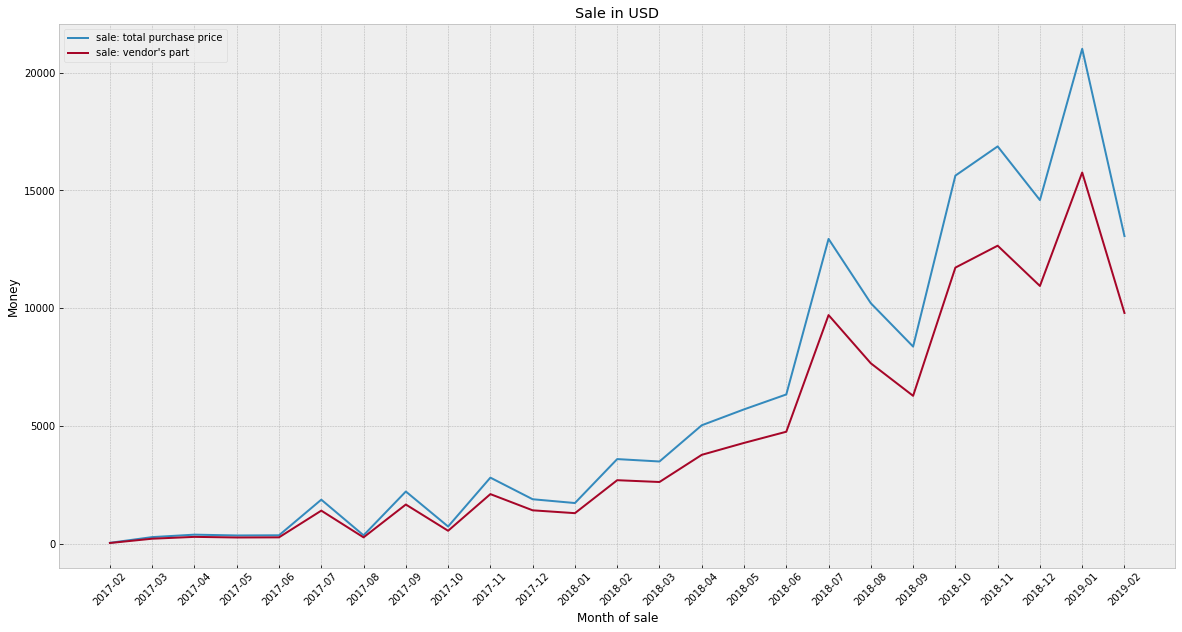

In [ ]:
plt.figure(figsize=(20,10)) 
plt.plot(df_sale["monthSale"], df_sale["sale_purchase_price"], label = "sale: total purchase price")
plt.plot(df_sale["monthSale"], df_sale["sale_vendor"], label = "sale: vendor's part")
#Set the x axis label of the current axis
plt.xlabel('Month of sale')
#Rotate the x axis labels
plt.xticks(rotation = 45)
#Set the y axis label of the current axis
plt.ylabel('Money')
#Set a title of the current axes
plt.title('Sale in USD')
#Show a legend on the plot
plt.legend()
#Display a figure
plt.show()

# Annual payments analysis

In [ ]:
#Choose only Annual transactions
df_year = df_clean.loc[df_clean['billingPeriod'] == 'Annual']

In [ ]:
df_year.shape

(484, 12)

In [ ]:
multiindex = []
for row in df_year.itertuples():
    dates = pd.date_range(start=row.maintenanceStartDate_sales, end=row.maintenanceEndDate_sales - MonthEnd(),
                          freq='M').strftime('%Y-%m')
    multiindex.extend([(row.transactionId, date) for date in dates])
index = pd.MultiIndex.from_tuples(multiindex)
df_y = pd.DataFrame(0, index=index, columns=['month'])
df_y = df_y.reset_index().drop(['month'], axis=1)
df_y.rename(columns={'level_0': 'transactionId', 'level_1': 'monthMaintenance'}, inplace=True)

In [ ]:
df_y.head(20)

,transactionId,monthMaintenance
0,AT-70778314,2019-02
1,AT-70778314,2019-03
2,AT-70778314,2019-04
3,AT-70778314,2019-05
4,AT-70778314,2019-06
5,AT-70778314,2019-07
6,AT-70778314,2019-08
7,AT-70778314,2019-09
8,AT-70778314,2019-10
9,AT-70778314,2019-11


In [ ]:
df_y.info()
#It was only 484 rows related to Annual transactions
#There is 6010 enries now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transactionId     6010 non-null   object
 1   monthMaintenance  6010 non-null   object
dtypes: object(2)
memory usage: 94.0+ KB


In [ ]:
#Merge DataFrame with extracted months for Annual payments with df_clean
df_final = df_y.merge(df_clean, how='outer', left_on='transactionId', right_on='transactionId', suffixes=('_l', '_r'))

In [ ]:
df_final = df_final.reset_index(drop=True)

In [ ]:
#Check if there are some duplicates
duplicates_final = df_final[df_final.duplicated()]
print("df_final has:", duplicates_final.shape[0], "duplicates.")

df_final has: 48 duplicates.


In [ ]:
#Remove duplicated entries
df_final = df_final.drop_duplicates()

In [ ]:
#Check if everything is fine
df_final.loc[df_final['billingPeriod'] == 'Annual'].sort_values(by=['transactionId', 'licenseId']).head(50)

,transactionId,monthMaintenance,licenseId,status,hosting_sales,saleDate,saleType,billingPeriod,maintenanceStartDate_sales,maintenanceEndDate_sales,purchasePrice,vendorAmount,monthSale
4752,106912,2018-04,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4754,106912,2018-05,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4756,106912,2018-06,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4758,106912,2018-07,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4760,106912,2018-08,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4762,106912,2018-09,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4764,106912,2018-10,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4766,106912,2018-11,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4768,106912,2018-12,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04
4770,106912,2019-01,SEN-11538533,active,Server,2018-04-12,Refund,Annual,2018-04-11,2019-04-11,-225.0,-168.75,2018-04


In [ ]:
#Now there are months for Monthly payments missing - extract all months from maitenanceStartDate
#They will be needed only for Monthly payments
df_final['monthForMonthly'] = pd.to_datetime(df_final['maintenanceStartDate_sales']).dt.to_period('M')

In [ ]:
#Unify the type of data related to months
df_final['monthForMonthly'] = df_final['monthForMonthly'].map(str)
df_final['monthMaintenance'] = df_final['monthMaintenance'].map(str)

In [ ]:
#Fill missing values in the monthMaintense with values from monthForMonthly
df_final['monthMaintenance'] = np.where(df_final['monthMaintenance'] == 'nan', df_final['monthForMonthly'], df_final['monthMaintenance'])

In [ ]:
#Count the number of months for each payment
df_final['numberOfMonths'] = ((df_final.maintenanceEndDate_sales - df_final.maintenanceStartDate_sales) / np.timedelta64(1, 'M')).round(0).astype(int)

In [ ]:
#Check if we have correct values for months
df_final['numberOfMonths'].value_counts()

12    4909
1     3531
36     504
24      95
13      51
10      50
7       49
9       46
18      36
5       35
17      35
11      33
15      31
14      28
21      21
19      19
6       17
4       16
16      16
8        8
2        6
3        3
0        1
Name: numberOfMonths, dtype: int64

In [ ]:
#There we have 1 zero
df_final.loc[df_final['numberOfMonths'] == 0]

,transactionId,monthMaintenance,licenseId,status,hosting_sales,saleDate,saleType,billingPeriod,maintenanceStartDate_sales,maintenanceEndDate_sales,purchasePrice,vendorAmount,monthSale,monthForMonthly,numberOfMonths
9006,AT-51871279,2019-02,SEN-11051903,active,Server,2018-04-16,Renewal,Annual,2019-02-01,2019-02-16,1.0,0.75,2018-04,2019-02,0


In [ ]:
#Replace 0 with 1
df_final['numberOfMonths'] = df_final['numberOfMonths'].replace(0, 1)

In [ ]:
df_final['numberOfMonths'].value_counts()
#Now we have not 0 values

12    4909
1     3532
36     504
24      95
13      51
10      50
7       49
9       46
18      36
5       35
17      35
11      33
15      31
14      28
21      21
19      19
6       17
4       16
16      16
8        8
2        6
3        3
Name: numberOfMonths, dtype: int64

In [ ]:
df_final['purchasePrice'] = df_final['purchasePrice'].astype('float').round(2)
df_final['vendorAmount'] = df_final['vendorAmount'].astype('float').round(2)
df_final['numberOfMonths'] = df_final['numberOfMonths'].astype('int')

In [ ]:
#Divide purchasePrice and vendorAmount by numberofMonths
#Thanks to this Annual payments are splitted between several months
df_final['purchasePrice']= (df_final['purchasePrice']/df_final['numberOfMonths']).round(2)
df_final['vendorAmount']= (df_final['vendorAmount']/df_final['numberOfMonths']).round(2)

In [ ]:
#Check if for Monhly transaction we have 1 in the numberOfMonths column
df_final.loc[df_final['transactionId'] == 'AT-33786592']

,transactionId,monthMaintenance,licenseId,status,hosting_sales,saleDate,saleType,billingPeriod,maintenanceStartDate_sales,maintenanceEndDate_sales,purchasePrice,vendorAmount,monthSale,monthForMonthly,numberOfMonths
9576,AT-33786592,2017-04,SEN-7171109,active,Cloud,2017-04-10,Renewal,Monthly,2017-04-10,2017-05-10,15.0,11.25,2017-04,2017-04,1


# MRR

In [ ]:
df_mrr = df_final.groupby(by='monthMaintenance').sum()

In [ ]:
#In this approach we have months of maitenance and distributed revenue, we can call it MRR
df_mrr.rename(columns={'purchasePrice': 'MRR_purchase_price', 'vendorAmount': 'MRR_vendor'}, inplace=True)
df_mrr.drop('numberOfMonths', axis = 1, inplace=True)
df_mrr.reset_index(inplace=True)
df_mrr

,monthMaintenance,MRR_purchase_price,MRR_vendor
0,2017-02,30.00,22.50
1,2017-03,133.29,99.96
2,2017-04,209.95,157.45
3,2017-05,374.51,280.87
4,2017-06,419.51,314.62
5,2017-07,641.84,481.36
6,2017-08,557.64,418.14
7,2017-09,680.92,510.59
8,2017-10,886.45,664.72
9,2017-11,1395.66,1046.59


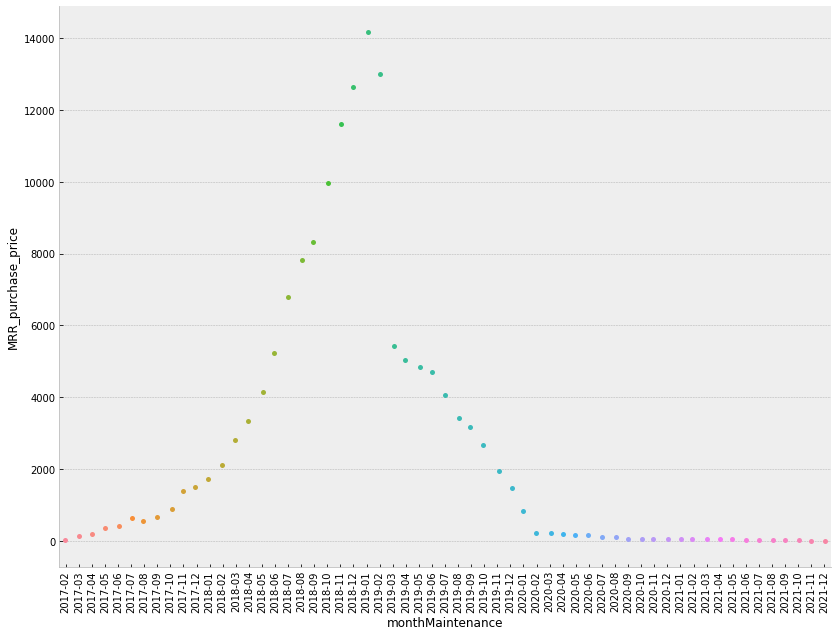

In [ ]:
g = sns.catplot(x="monthMaintenance", y="MRR_purchase_price", data=df_mrr, height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)

In [ ]:
#There are months for wich we have only information from Annual transaction distibution
#(They relate to a period beyond the time range of our data sets)
#We should hide them
df_reduced = df_mrr.loc[:23]

In [ ]:
df_reduced

,monthMaintenance,MRR_purchase_price,MRR_vendor
0,2017-02,30.00,22.50
1,2017-03,133.29,99.96
2,2017-04,209.95,157.45
3,2017-05,374.51,280.87
4,2017-06,419.51,314.62
5,2017-07,641.84,481.36
6,2017-08,557.64,418.14
7,2017-09,680.92,510.59
8,2017-10,886.45,664.72
9,2017-11,1395.66,1046.59


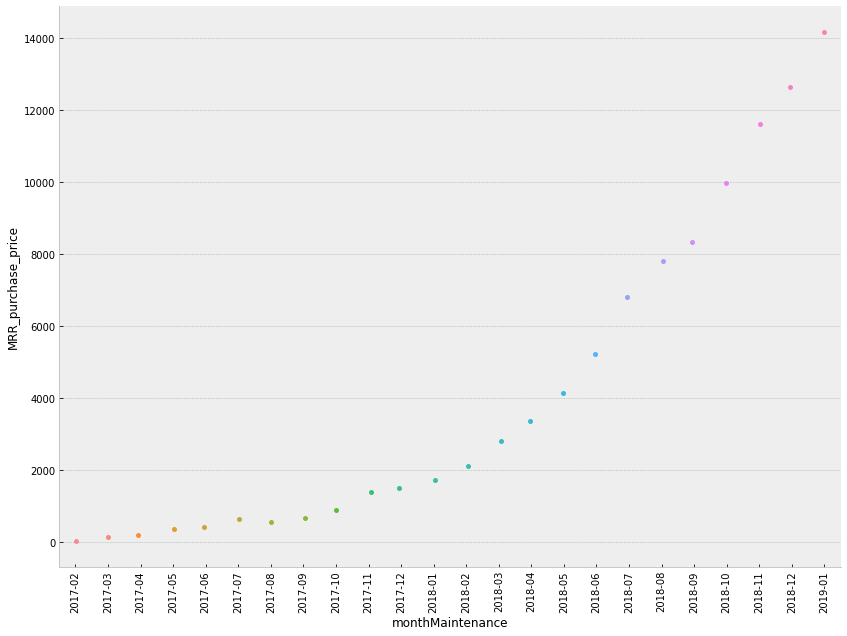

In [ ]:
g = sns.catplot(x="monthMaintenance", y="MRR_purchase_price", data=df_reduced, height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)

[Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09'),
 Text(0, 0, '2017-10'),
 Text(0, 0, '2017-11'),
 Text(0, 0, '2017-12'),
 Text(0, 0, '2018-01'),
 Text(0, 0, '2018-02'),
 Text(0, 0, '2018-03'),
 Text(0, 0, '2018-04'),
 Text(0, 0, '2018-05'),
 Text(0, 0, '2018-06'),
 Text(0, 0, '2018-07'),
 Text(0, 0, '2018-08'),
 Text(0, 0, '2018-09'),
 Text(0, 0, '2018-10'),
 Text(0, 0, '2018-11'),
 Text(0, 0, '2018-12'),
 Text(0, 0, '2019-01')]

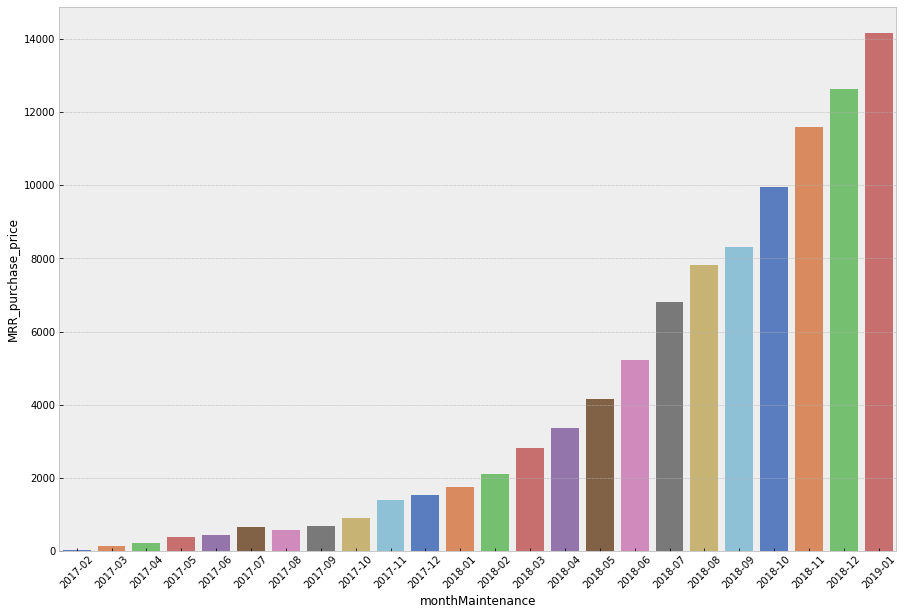

In [ ]:
plt.figure(figsize=(15,10))
g = sns.barplot(x="monthMaintenance", y="MRR_purchase_price",
                data=df_reduced, palette="muted")
g.set_xticklabels(df_reduced["monthMaintenance"], rotation=45)

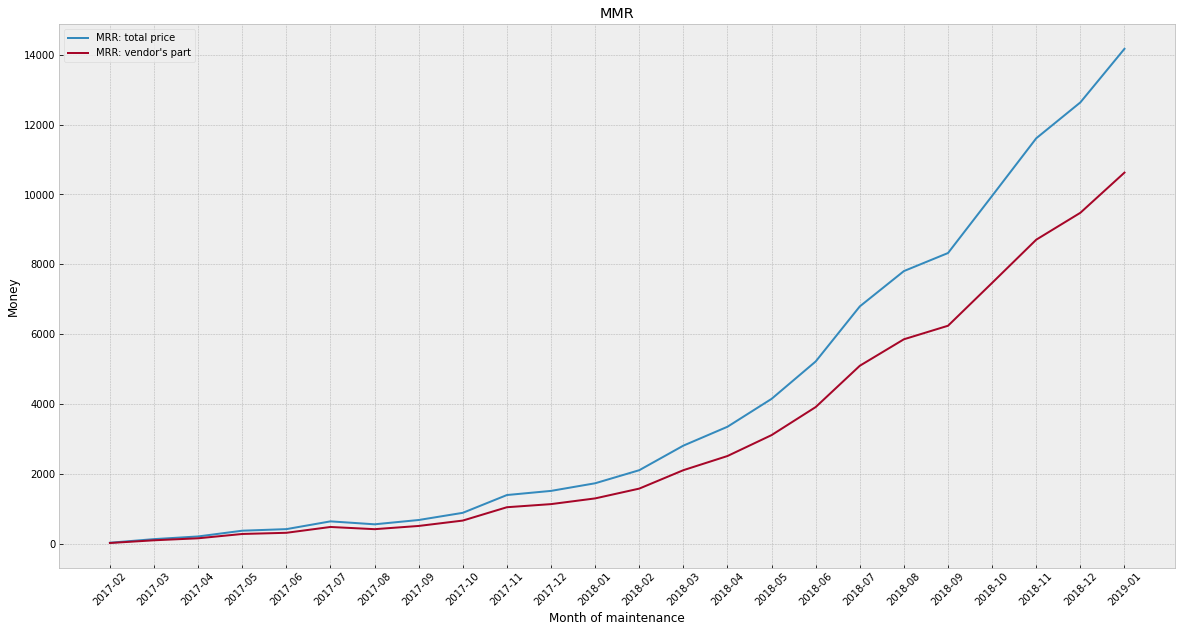

In [ ]:
plt.figure(figsize=(20,10)) 
plt.plot(df_reduced["monthMaintenance"], df_reduced["MRR_purchase_price"], label = "MRR: total price")
plt.plot(df_reduced["monthMaintenance"], df_reduced["MRR_vendor"], label = "MRR: vendor's part")
#Set the x axis label of the current axis
plt.xlabel('Month of maintenance')
#Rotate the x axis labels
plt.xticks(rotation = 45)
#Set the y axis label of the current axis
plt.ylabel('Money')
#Set a title of the current axes
plt.title('MMR')
#Show a legend on the plot
plt.legend()
#Display a figure
plt.show()

#The plot shows the trend of MRR (purchasePrice and vendorAmount separately) over time as line plots
#This provides a good overview of how the organization’s revenue is growing
#We can see from the plot that the total MRR seems to increase at a roughly linear rate

# Sale & MMR

In [ ]:
#Merge DataFrames: df_sale and df_reduced 
df_both = df_reduced.merge(df_sale, how='left', left_on='monthMaintenance', right_on='monthSale', suffixes=('_mrr', '_sales'))

In [ ]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   monthMaintenance     24 non-null     object 
 1   MRR_purchase_price   24 non-null     float64
 2   MRR_vendor           24 non-null     float64
 3   monthSale            24 non-null     object 
 4   sale_purchase_price  24 non-null     float64
 5   sale_vendor          24 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.3+ KB


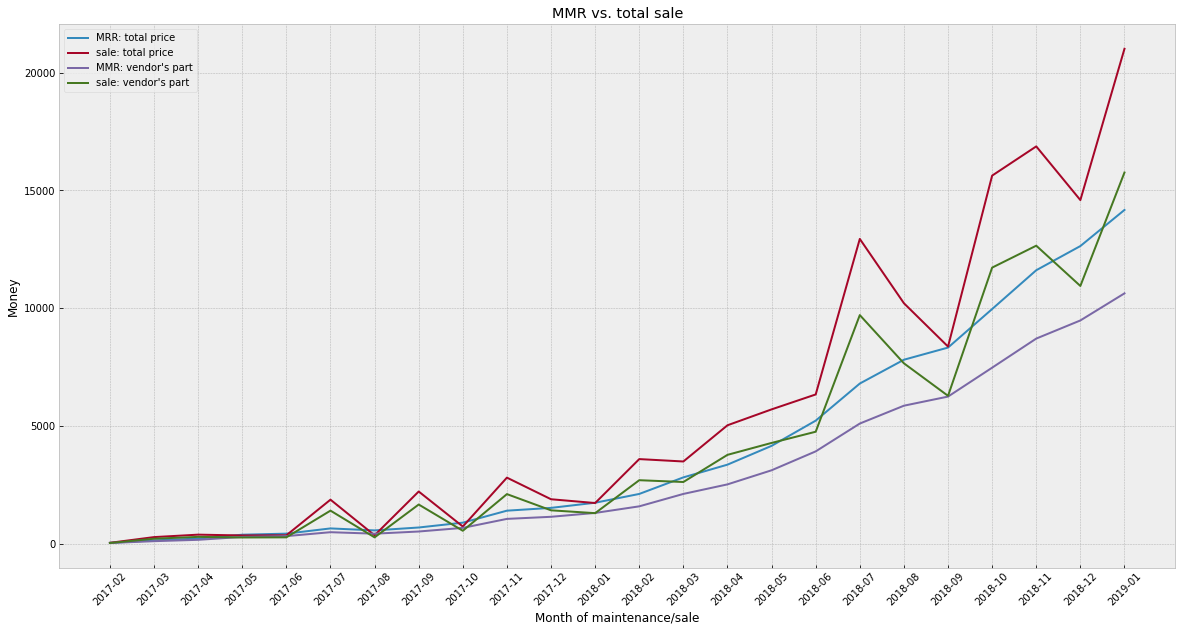

In [ ]:
#Plot for total price and vendor's part - MMR & sale 
plt.figure(figsize=(20,10)) 
plt.plot(df_both["monthMaintenance"], df_both["MRR_purchase_price"], label = "MRR: total price")
plt.plot(df_both["monthMaintenance"], df_both["sale_purchase_price"], label = "sale: total price")
plt.plot(df_both["monthMaintenance"], df_both["MRR_vendor"], label = "MMR: vendor's part")
plt.plot(df_both["monthMaintenance"], df_both["sale_vendor"], label = "sale: vendor's part")
#Set the x axis label of the current axis
plt.xlabel('Month of maintenance/sale')
#Rotate the x axis labels
plt.xticks(rotation = 45)
#Set the y axis label of the current axis
plt.ylabel('Money')
#Set a title of the current axes
plt.title('MMR vs. total sale')
#Show a legend on the plot
plt.legend()
#Display a figure
plt.show()

In [ ]:
#Prepare the result DataFrames
df_result_total_price = df_both[['monthMaintenance', 'MRR_purchase_price', 'sale_purchase_price']]
df_result_total_price = df_result_total_price.rename(columns={'monthMaintenance': 'month'})
df_result_vendor = df_both[['monthMaintenance', 'MRR_vendor', 'sale_vendor']]
df_result_vendor = df_result_vendor.rename(columns={'monthMaintenance': 'month'})

In [ ]:
df_result_total_price

,month,MRR_purchase_price,sale_purchase_price
0,2017-02,30.00,30.00
1,2017-03,133.29,273.00
2,2017-04,209.95,377.00
3,2017-05,374.51,342.50
4,2017-06,419.51,350.00
5,2017-07,641.84,1863.00
6,2017-08,557.64,348.80
7,2017-09,680.92,2209.60
8,2017-10,886.45,722.80
9,2017-11,1395.66,2799.28


In [ ]:
df_result_vendor

,month,MRR_vendor,sale_vendor
0,2017-02,22.50,22.50
1,2017-03,99.96,204.75
2,2017-04,157.45,282.75
3,2017-05,280.87,256.87
4,2017-06,314.62,262.50
5,2017-07,481.36,1397.25
6,2017-08,418.14,261.53
7,2017-09,510.59,1657.12
8,2017-10,664.72,542.03
9,2017-11,1046.59,2099.37


In [ ]:
#df_final.to_csv("drive/MyDrive/df_final.csv", sep=";")

In [ ]:
#df_both.to_csv("drive/MyDrive/df_Both.csv", sep=";")

# Additional analysis

In [ ]:
df_additional = df_clean.copy()

In [ ]:
df_additional.columns

Index(['transactionId', 'licenseId', 'status', 'hosting_sales', 'saleDate',
       'saleType', 'billingPeriod', 'maintenanceStartDate_sales',
       'maintenanceEndDate_sales', 'purchasePrice', 'vendorAmount',
       'monthSale'],
      dtype='object')

In [ ]:
df_additional['monthForMonthly'] = pd.to_datetime(df_additional['saleDate']).dt.to_period('M')

In [ ]:
cat = ['Renewal', 'New', 'Upgrade', 'Refund']
df_additional['saleType'] = df_additional['saleType'].astype('category')

df_a = df_additional.groupby([df_additional['monthForMonthly'], df_additional['saleType']]).agg(['size']).rename(columns={'size':'Quantity'}).unstack(fill_value=0).stack()

In [ ]:
df_a.loc[:, ('transactionId','Quantity')]

monthForMonthly  saleType
2017-02          New           1
                 Refund        0
                 Renewal       0
                 Upgrade       0
2017-03          New           7
                 Refund        0
                 Renewal       1
                 Upgrade       0
2017-04          New          12
                 Refund        0
                 Renewal       5
                 Upgrade       0
2017-05          New           7
                 Refund        0
                 Renewal      11
                 Upgrade       0
2017-06          New           3
                 Refund        0
                 Renewal      15
                 Upgrade       1
2017-07          New          15
                 Refund        0
                 Renewal      17
                 Upgrade       0
2017-08          New           8
                 Refund        0
                 Renewal      20
                 Upgrade       4
2017-09          New          12
                 

In [ ]:
saleTypeCross = pd.crosstab(df_additional['monthForMonthly'], df_additional['saleType'])

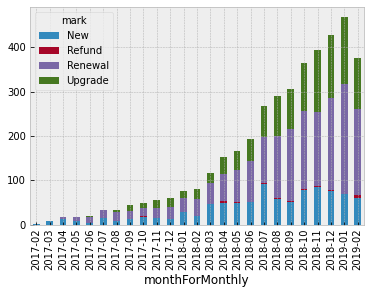

In [ ]:
saleTypeCross.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()